In [1]:
#importing necessaary libraries and functions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve)

### Load and Overview of the dataset

In [2]:
df=pd.read_csv(r'C:\Users\user\Downloads\German_Credit.csv')

In [3]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose
0,67,male,skilled,own,little,little,1169,6,0,radio/TV
1,22,female,skilled,own,little,moderate,5951,48,1,radio/TV
2,49,male,unskilled_and_non-resident,own,little,little,2096,12,0,education
3,45,male,skilled,free,little,little,7882,42,0,furniture/equipment
4,53,male,skilled,free,little,little,4870,24,1,car


In [4]:
df.tail()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose
995,31,female,unskilled_and_non-resident,own,little,little,1736,12,0,furniture/equipment
996,40,male,highly skilled,own,little,little,3857,30,0,car
997,38,male,skilled,own,little,little,804,12,0,radio/TV
998,23,male,skilled,free,little,little,1845,45,1,radio/TV
999,27,male,skilled,own,moderate,moderate,4576,45,0,car


### Shape of dataset

In [5]:
df.shape

(1000, 10)

### Datatypes of columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Risk              1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


* There are 6 categorical columns
* 3 columns (Age, Credit amount, Duration) have continous values
* Risk even though is an int dtype it has only two unique values 0 and 1

### Checking for Null Values

In [7]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Risk                0
Purpose             0
dtype: int64

* There are no null values in the dataset

### Statistical Summary of Data

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000,3,skilled,630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,1000,4,little,786,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,1000,3,moderate,472,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Risk,1000.0,NaN,NaN,NaN,0.3,0.458487,0.0,0.0,0.0,1.0,1.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* The mean for the Age column is higher than the median, so it is slightly right skewed.
* The median is less than the mean of the Credit amount so it is a right skewed distribution.
* Similary Duration is also has skewed distribution

In [9]:
# Creating a list of all the columns which are categorical variables

col=['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account','Risk', 'Purpose']

In [10]:
# Printing the value counts for each type in all the categorical columns

for i in col:
    print(df[i].value_counts())
    print('-'*50)

male      690
female    310
Name: Sex, dtype: int64
--------------------------------------------------
skilled                       630
unskilled_and_non-resident    222
highly skilled                148
Name: Job, dtype: int64
--------------------------------------------------
own     713
rent    179
free    108
Name: Housing, dtype: int64
--------------------------------------------------
little        786
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64
--------------------------------------------------
moderate    472
little      465
rich         63
Name: Checking account, dtype: int64
--------------------------------------------------
0    700
1    300
Name: Risk, dtype: int64
--------------------------------------------------
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12


### Univariate anlaysis

In [11]:
# Function to plot the countplot of categorical variables with percentage or 
# the frequency of each type persent in that variable.
 

def barplt(data,cl1,prec=False,n=None):
    total=len(data[cl1])
    count=data[cl1].nunique()
    
    if n is None:
        plt.figure(figsize=(count+1,5))
    else:
        plt.figure(figsize=(n+1,5))
    
    plt.xticks(rotation=90,fontsize=15)
    pt=sns.countplot(data=data,x=cl1,palette='Paired',order=data[cl1].value_counts().index[:n].sort_values())
    
    for p in pt.patches:
        if prec==True:
            label='{:.1f}%'.format(100*p.get_height()/total)
        else:
            label=p.get_height()
        
        x=p.get_x()+p.get_width()/2
        y=p.get_height()
        
        pt.annotate(label,(x,y),ha='center',va='center',size=12,xytext=(0,5),textcoords='offset points')
    
    plt.show()
        

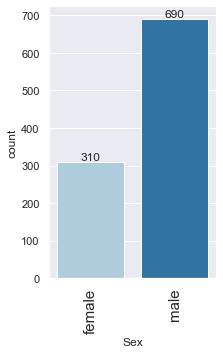

In [12]:
barplt(df,'Sex')

* There are more male than female in the data

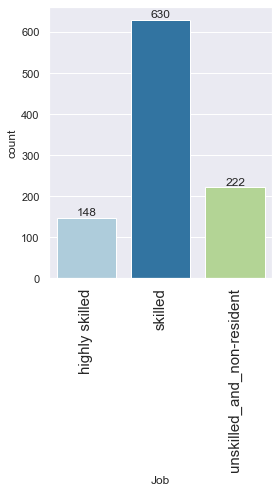

In [13]:
barplt(df,'Job')

* There are more skilled job type than others

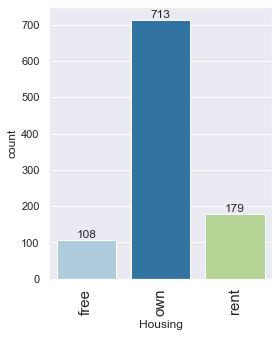

In [14]:
barplt(df,'Housing')

* Most of them own their own houses

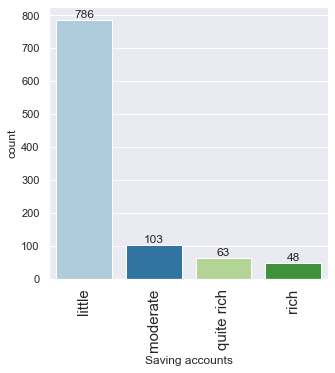

In [15]:
barplt(df,'Saving accounts')

* People with little savings account are the highest

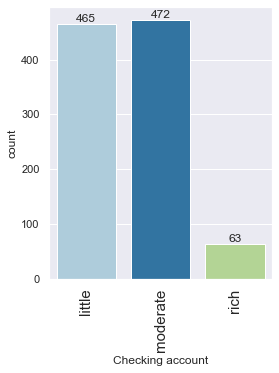

In [16]:
barplt(df,'Checking account')

* Checking account has almost equal number of moderate and little

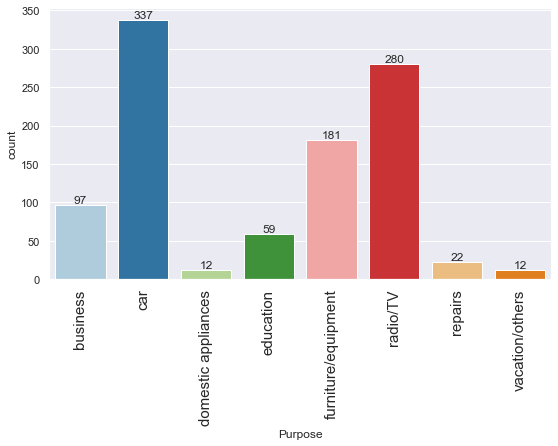

In [17]:
barplt(df,'Purpose')

* Most of the people apply for loan to get car, radio/TV and furniture/equipment.

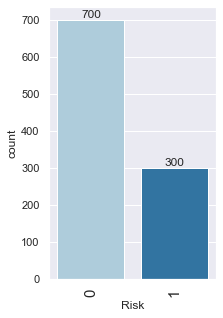

In [18]:
barplt(df,'Risk')

* There are more people who paid back the loan than who have defaulted

In [19]:
def hiplt(data,col,kde=False):
    fig,axs=plt.subplots(nrows=2,ncols=1,sharex=True,gridspec_kw={"height_ratios": (0.25, 0.75)},figsize=(12,7))
    sns.boxplot(data=data,x=col,ax=axs[0],showmeans=True)
    sns.histplot(data=data,x=col,stat='density',kde=kde,element='step',ax=axs[1])
    axs[1].axvline(data[col].mean(),color='green',linestyle='--')
    axs[1].axvline(data[col].median(),color='black',linestyle='-')
    plt.show()

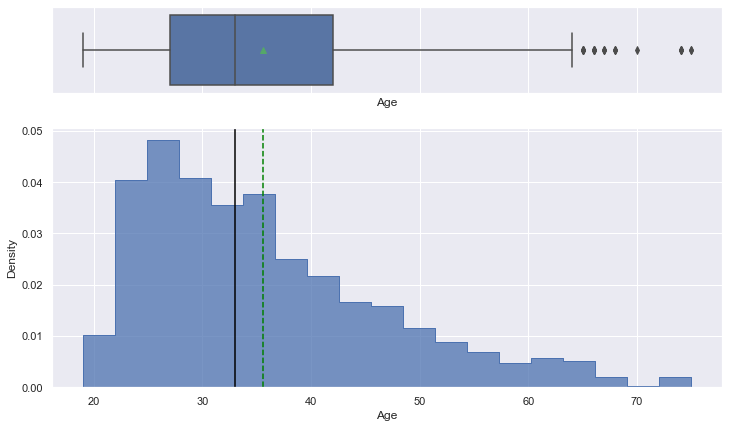

In [20]:
hiplt(df,'Age')

* Data is skewed
* There are outliers on the right side according to boxplot
* Outliers will not be treated as they represent real case scenario

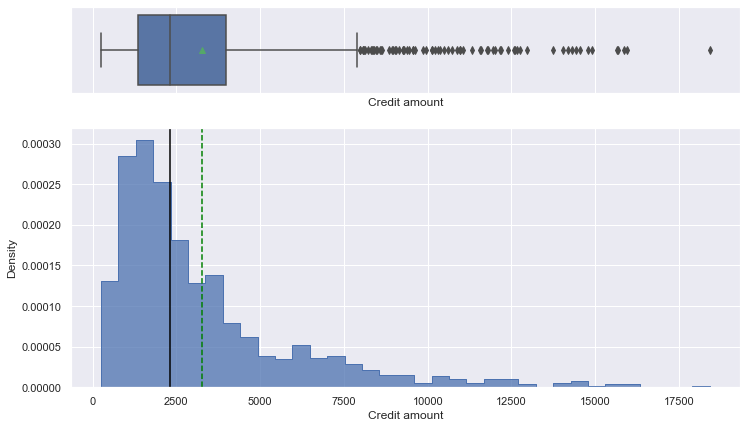

In [21]:
hiplt(df,'Credit amount')

* The Credit amount is highly right skewed
* There are many outliers on the right side according to the box plot
* The outliers are not treated because they are not unusual values and represent the real world

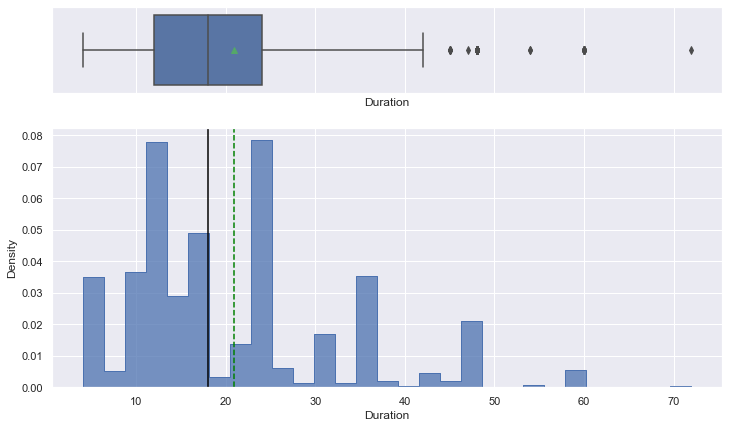

In [22]:
hiplt(df,'Duration')

* This data does not have a gaussian distribution
* The data has outliers according to boxplot
* But the outliers are possible depending on the credit amount, so are not treated

### Bivariate analysis

In [23]:
#col=['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account','Risk', 'Purpose']

def bxpl(data,cl):
    for i in col:
        plt.figure(figsize=(10,5))
        plt.xticks(rotation=45,fontsize=12)
        sns.boxplot(data=df,y=cl,x=i,showmeans=True,meanprops={'marker':'o','markerfacecolor':'white','markeredgecolor':'black','markersize':'6'})
        plt.show()    

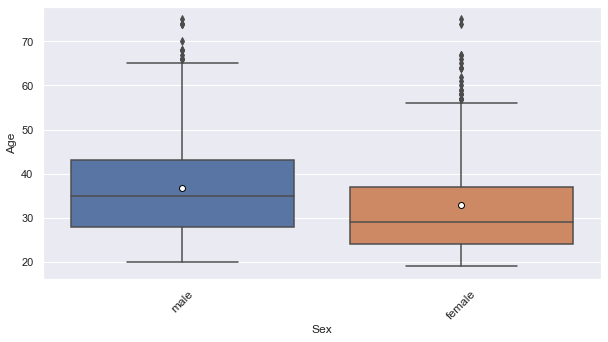

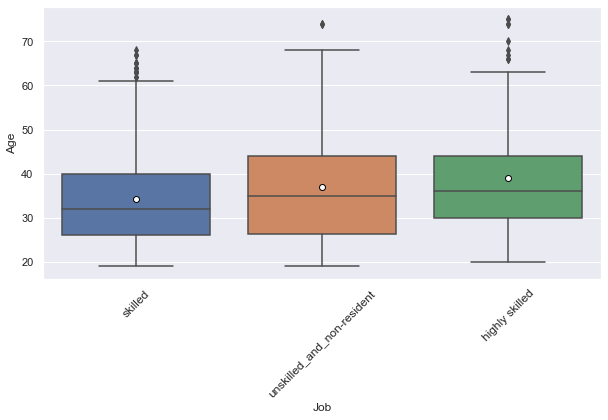

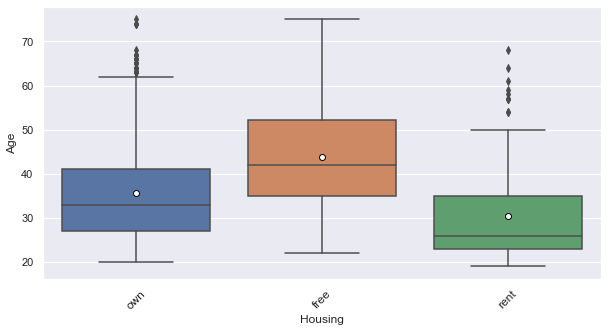

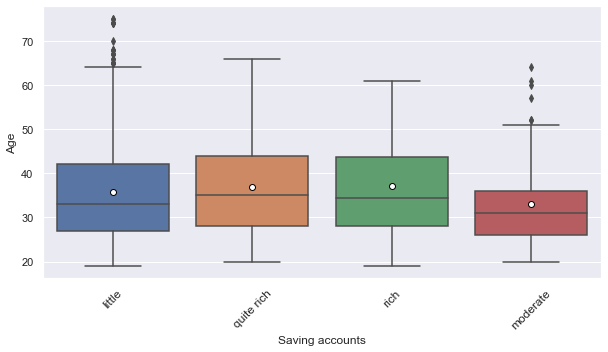

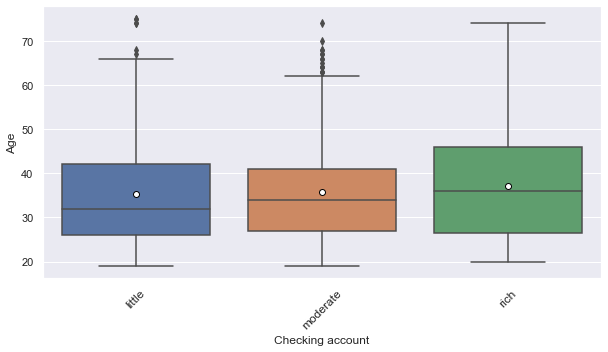

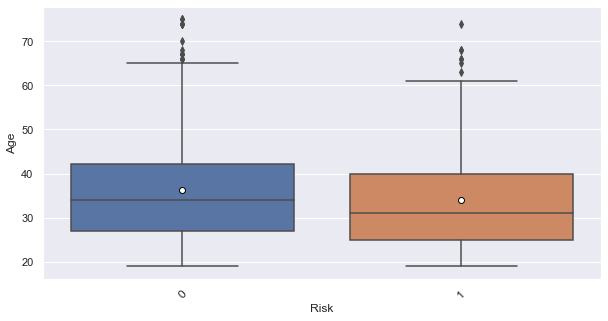

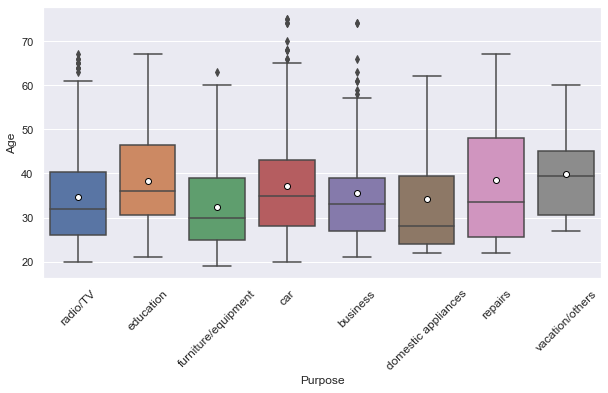

In [24]:
bxpl(df,'Age')

* The median and mean age of male is higher than females. There are more outliers for females than males.
* The median age of highly skilled is highest and next for unskilled_and_non-resident. All types have outliers
* The median age of people having free housing is highest. Next median age of people with own house has higher age than with those of people who rent a house.
* The median age of rich and quite rich is higher than that of little and moderate savings account
* For checking account rich have higher age compared to the little and moderate
* People who default have less age compared to that of people who donot default
* The people who take loan for domestic appliances have the lowest median age and the purpose of vacation/others have the highest median age. The median age of car and education is almost same and the remaining purposes median age is almost similar.

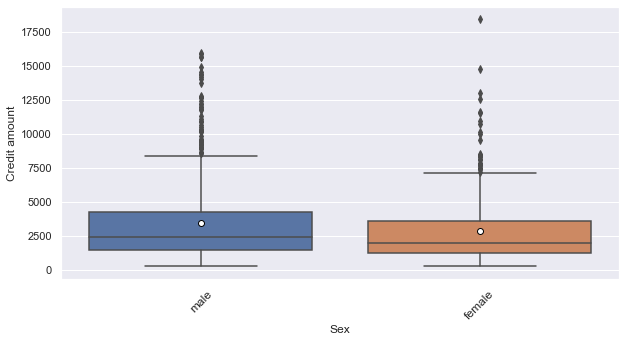

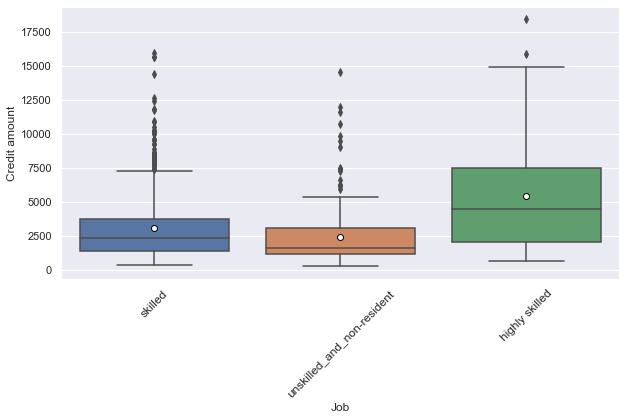

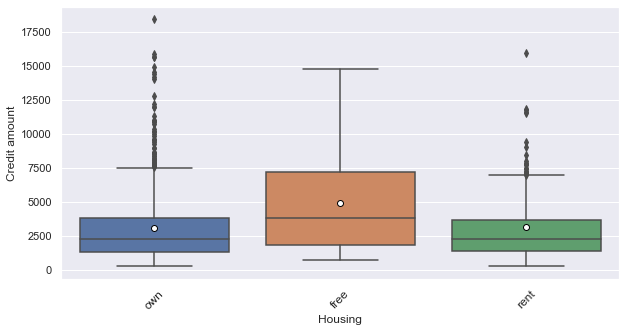

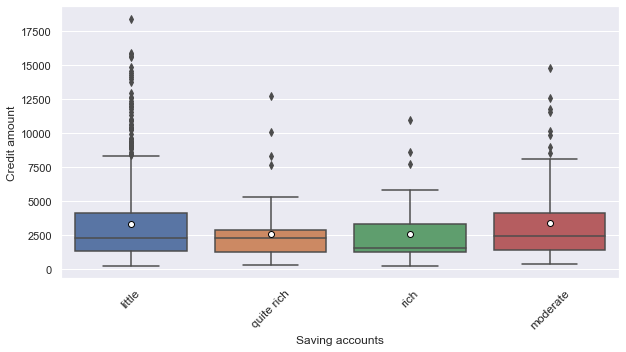

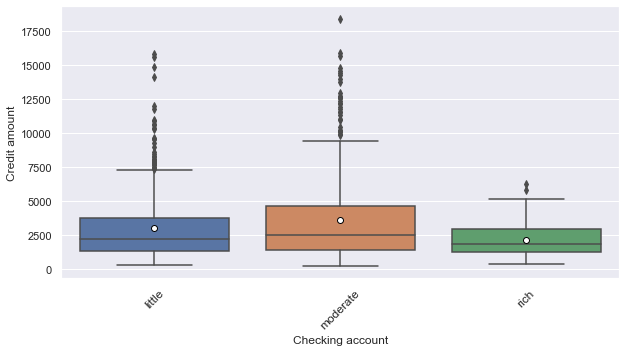

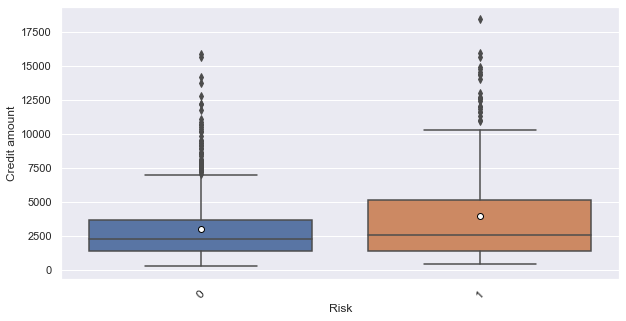

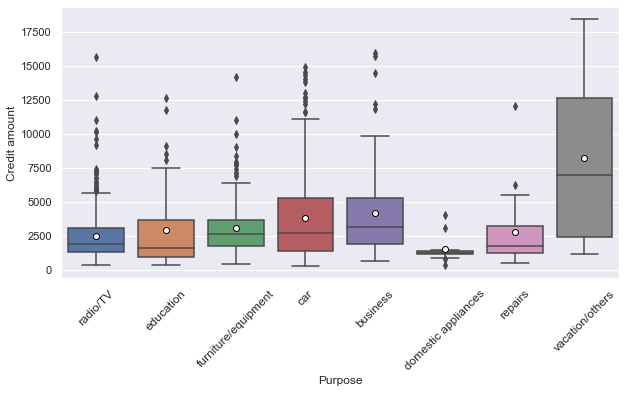

In [25]:
bxpl(df,'Credit amount')

* The median credit amount for male is higher than female. Both male and female have outliers, but the highest credit amount was taken by female.
* The median credit amount taken by highly skilled is highest, with skilled higher than uskilled_and_non-resident. There are outliers for all but the highest credit amount is for highly skilled which is over 17500.
* People with free housing has the highest median credit amount. The median amount for people with own and rent housing is almost similar. The highest amount is by people with own housing and there are outliers for own and rent housing.
* The median credit amount for little, quite rich and moderate saving account is almost similar, with rich saving account being the lowest. There are outliers with highest being for the little savings account.
* The median credit amount for all checking accounts is almost similar with moderate being slightly more. Rich checking account has the lowest max value and all have outliers.
* There is a little difference between the median credit amount for defaulters and non defaulters. There are outliers for both and also the max amount is almost similar.
* The median credit amount for vacation/others is highest with approximately 7500. Next business median crdit amount is higher, with car and furniture/equipment slightly behind. All the other have a similar median credit amount. 
* The outliers are not treated because they represent real case scenario.

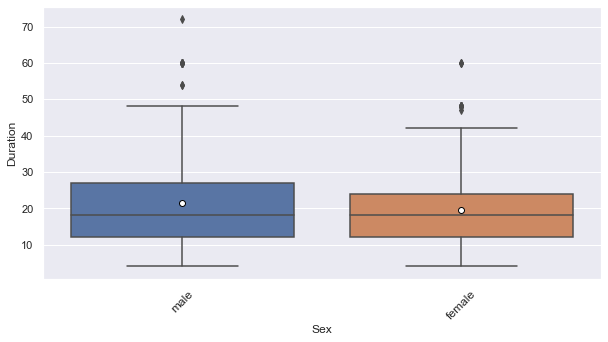

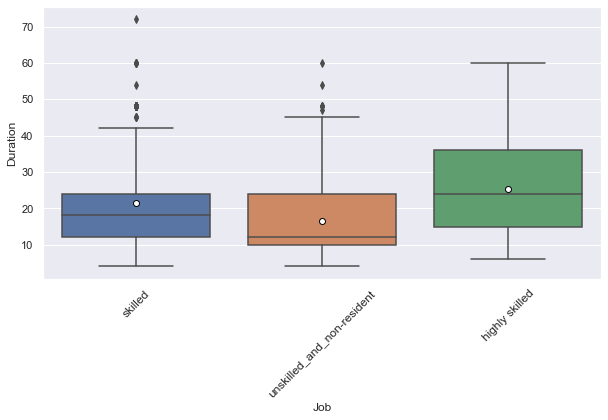

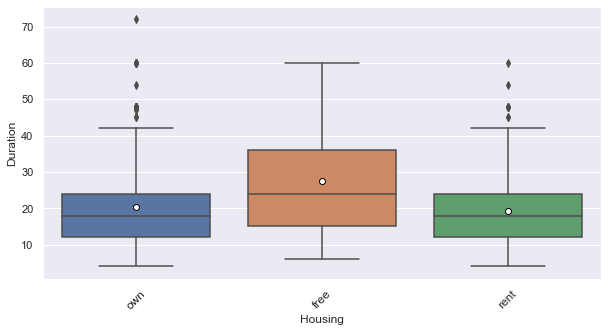

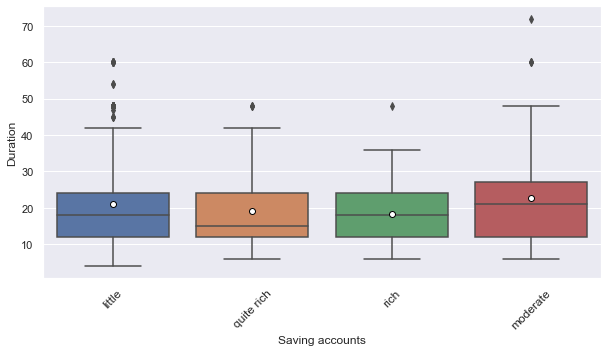

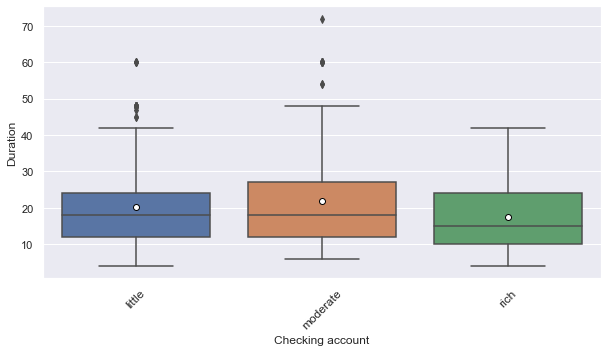

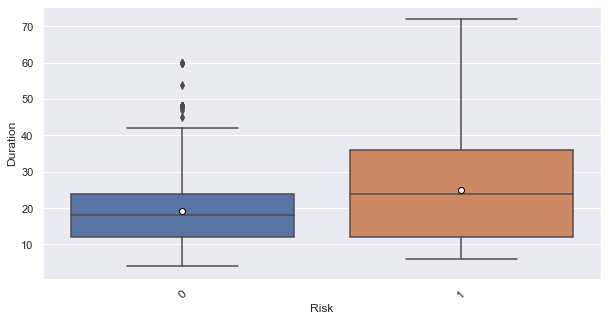

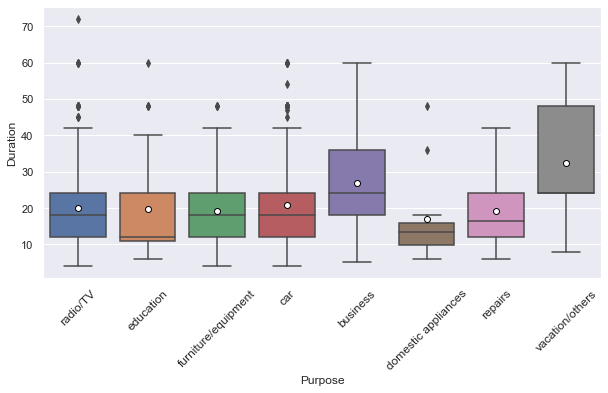

In [26]:
bxpl(df,'Duration')

* The median duration for both male and female are similar, with max being >70 for male.
* The median duration for highly_skilled is highest probably due to higher credit amount. Next with skilled being higher than unskilled_and_non-resident.
* The median duration is highest for free housing followed by the own and rent housing.
* The moderate saving accounts has the highest median duration. The rich and little has the same median duration, with quite rich being the lowest.
* The rich has the lowest median duration with moderate and little being almost similar.
* The defaulters have a high median duration compared to non-defaulters.
* Business has the highest median duration, with radio/TV, furniture/equipment, car being the second highest. Education has the lowest median duration.
* The outliers are not treated.

In [27]:
# Function to plot the countplot of a categorical variable with hue as another categorical variable.
# The percent of each type in hue is displayed on the top of bars in the plot.

def cntplt(data,cl1,cl2,prec=False):
    
    count=data[cl2].nunique()
    plt.figure(figsize=(count+4,5))
    pt=sns.countplot(data=data,x=cl1,hue=cl2)

    hei=[]
    wid=[]
    xl=[]
    for p in pt.patches:
        hei.append(p.get_height())
        wid.append(p.get_width())
        xl.append(p.get_x())

    count=0
    for i in range(df[cl2].nunique()):
        for j in range(df[cl1].nunique()):
            if prec==True:
                label='{:.1f}%'.format(100*hei[count]/df[cl2].value_counts(sort=False).values[i])
            else:
                label=hei[count]

            x=xl[count]+wid[count]/2
            y=hei[count]

            pt.annotate(label,(x,y),ha='center',va='center',size=12,xytext=(0,5),textcoords='offset points') 

            count+=1

    plt.show()

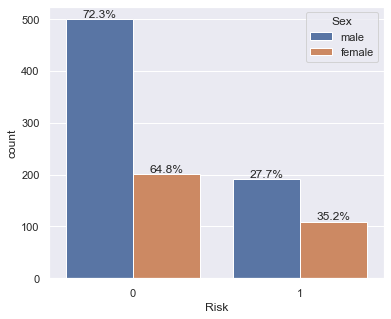

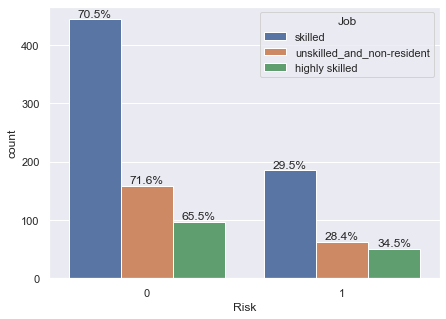

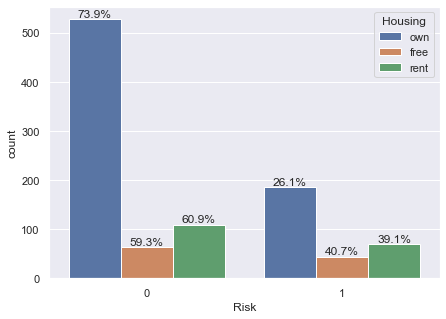

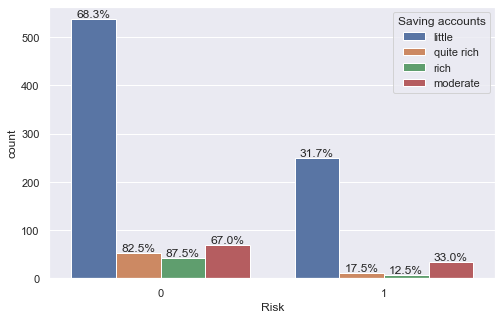

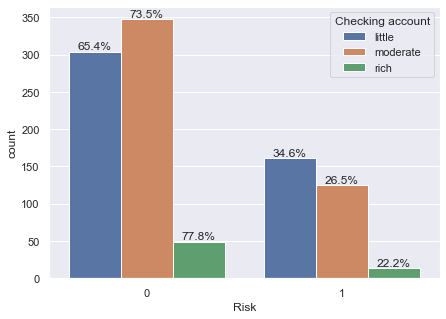

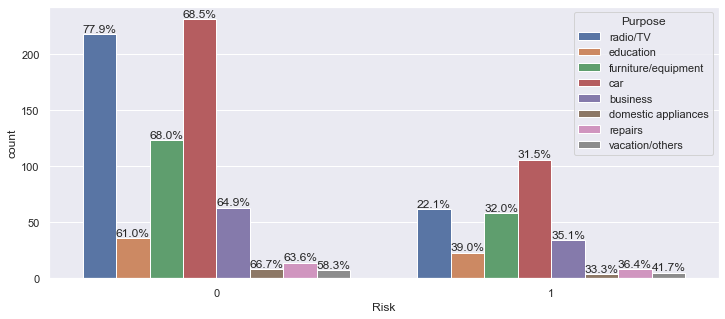

In [28]:
for i in col:
    if i!='Risk':
        cntplt(df,'Risk',i,prec=True)

* The percentage of females defaulting is higher than that of males.
* Highly skilled jobs have highest percentage of defaulting, the remaing two being almost similar.
* People with free and rent housing tend to default more at approx 40%, compared to people with own houses.
* Moderate savings account has the highest defaulters, with little being the second. The quite rich and rich defaulting is comparitively low.
* About 34.6% of the little  and 26.5% of moderate checking account default. Rich has the lowest default percentage.
* Vaction/others have the highest defaulters about 41.7%. Education, Business and repairs have greater than 35% defaulters. Furniture/equipment, car and domestic appliances have greater than 30% and less than 35% defaulters. Radio/TV has the lowest with 22%.

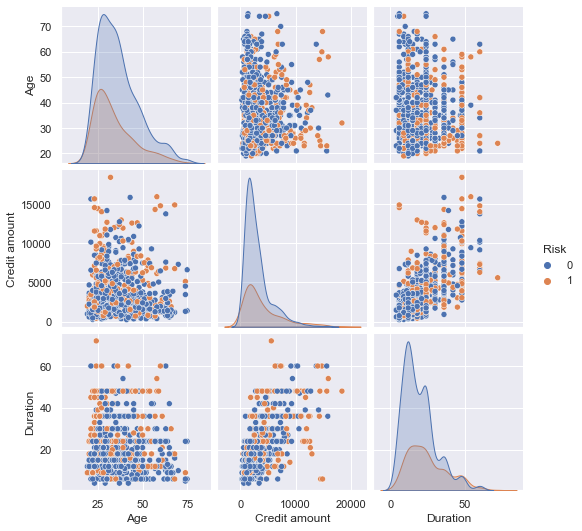

In [29]:
sns.pairplot(df,hue='Risk',diag_kind='kde')

* There is no clear distiction between the defaulters and non defaulters due to overlapping.
* Further the relation between the continous varibles is not clearly depicted.

<AxesSubplot:>

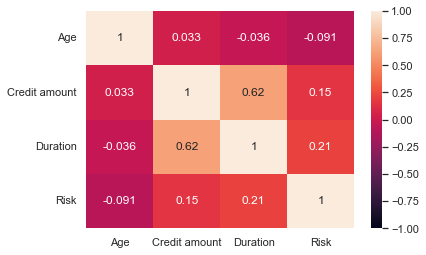

In [30]:
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)

* Only the credit amount and duration have a correlation above 0.5 i.e. 0.62
* Credit amount and duration has a positive correlation, so both either increase or decrease together.

### Data Preparation

In [31]:
# Splitting the feature and target variables

X=df.drop(columns=['Risk'],axis=1)
Y=df['Risk']

In [32]:
# One hot encoding the categorical features

X=pd.get_dummies(X,drop_first=True)

In [33]:
X.head()

,Age,Credit amount,Duration,Sex_male,Job_skilled,Job_unskilled_and_non-resident,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1169,6,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,22,5951,48,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2,49,2096,12,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,45,7882,42,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,53,4870,24,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Splitting train and test data

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

### Model Building

In [35]:
# Function for the evaluation of model performance based on different metrics

def model_performance(model,features,target,threshold=0.5):
    
    prob=model.predict_proba(features)[:,1]
    pred=np.round(prob>threshold)
    
    acc=accuracy_score(target,pred)
    recall=recall_score(target,pred)
    precision=precision_score(target,pred)
    f1=f1_score(target,pred)
    
    df_score = pd.DataFrame({'accuracy':acc,'recall':recall,'precision':precision,'f1_score':f1},index=[0])
    
    return df_score

In [36]:
# Function for plotting the confusion matrix

def confusion_mat(model,features,target,threshold=0.5):
    
    prob=model.predict_proba(features)[:,1]
    pred=np.round(prob>threshold)
    
    cm = confusion_matrix(target, pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(solver='newton-cg',random_state=1)
lr.fit(x_train,y_train)

LogisticRegression(random_state=1, solver='newton-cg')

In [38]:
pd.DataFrame(lr.coef_[0],X.columns,columns=['coef']).T

,Age,Credit amount,Duration,Sex_male,Job_skilled,Job_unskilled_and_non-resident,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
coef,-0.021663,0.000023,0.03672,-0.364746,-0.091354,0.093066,-0.430597,0.095108,0.139992,-0.297214,-1.141846,-0.498337,-0.239458,-0.271782,0.13988,-0.229546,-0.225553,-0.607436,0.397297,-0.352849


* All the coefficients are log(odds)
* Coefficients of Duration, Housinng_rent, Saving accounts_moderate, Purpose_domestic appliances and Purpose_repairs are positive, so an increase in this will increase the chance of defaulting.
* Remaining all have negative coefficients, so an increase in those will lead to decrease in chance of being a defaulter.

### Model performance

In [39]:
train_mod=model_performance(lr,x_train,y_train)
train_mod

,accuracy,recall,precision,f1_score
0,0.715714,0.247664,0.582418,0.347541


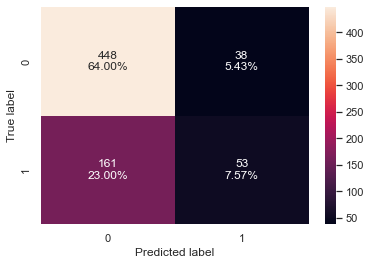

In [40]:
confusion_mat(lr,x_train,y_train)

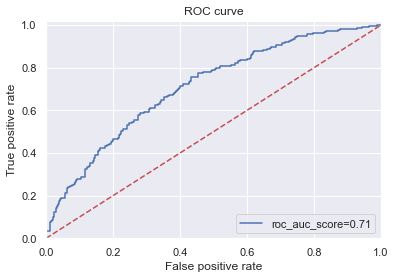

In [41]:
rsco=roc_auc_score(y_train,lr.predict_proba(x_train)[:,1])
fpr,tpr,thres=roc_curve(y_train,lr.predict_proba(x_train)[:,1])
plt.plot(fpr,tpr,label='roc_auc_score=%0.2f'%rsco)
plt.plot([0,1],[0,1],'r--')
plt.xlim(0,1)
plt.ylim(0,1.02)
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

* The recall score on the training dataset is very low, so to imporve it further the we can try changing the threshold.


### Finding the optimal threshold using ROC curve

In [42]:
fpr,tpr,threshold = roc_curve(y_train,lr.predict_proba(x_train)[:,1])

opt_ind=np.argmax(tpr-fpr)
opt_tres=threshold[opt_ind]
print('Optimal threshold: ',opt_tres)

Optimal threshold:  0.2678325794796457


In [43]:
train_mod_auc=model_performance(lr,x_train,y_train,threshold=opt_tres)
train_mod_auc

,accuracy,recall,precision,f1_score
0,0.622857,0.752336,0.432796,0.549488


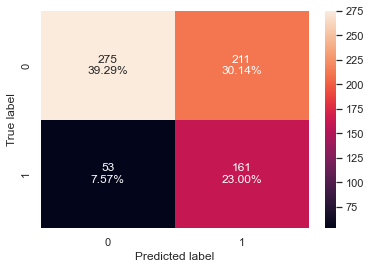

In [44]:
confusion_mat(lr,x_train,y_train,opt_tres)

* Recall is high but the precision is low, so a new threshold which balances both can be identified using precision recall curve.

### Using Precision recall curve to find a better threshold

In [45]:
# Function for plotting the precision recall curve

def pre_re_curve(precision, recall, threshold):
    plt.figure(figsize=(12,5))
    plt.plot(threshold,precision[:-1],'b--',label='Precision')
    plt.plot(threshold,recall[:-1],'g--',label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center right')
    plt.ylim(0,1.05)
    plt.xticks(np.linspace(0,1,21))
    plt.show()

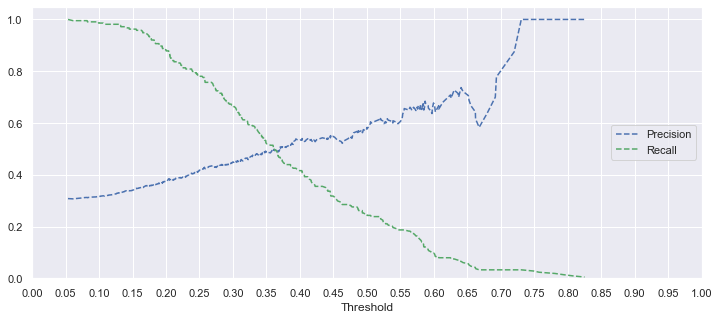

In [46]:
y_prob=lr.predict_proba(x_train)[:,1]
pre,re,thres=precision_recall_curve(y_train,y_prob)
pre_re_curve(pre,re,thres)

* From the precision recall curve we can see that they both are equal at approx threshold of 0.36. So if we want recall score to be higher then we can choose something between 0.3 - 0.35, so that precision is not affected too much.

In [47]:
train_mod_pr=model_performance(lr,x_train,y_train,threshold=0.34)
train_mod_pr

,accuracy,recall,precision,f1_score
0,0.675714,0.556075,0.474104,0.511828


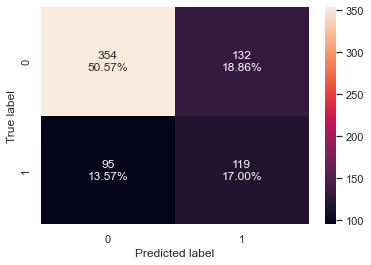

In [48]:
confusion_mat(lr,x_train,y_train,threshold=0.34)

### Model performance evaluation on test set

In [49]:
# Threshold as 0.5

test_mod=model_performance(lr,x_test,y_test)
test_mod

,accuracy,recall,precision,f1_score
0,0.72,0.255814,0.52381,0.34375


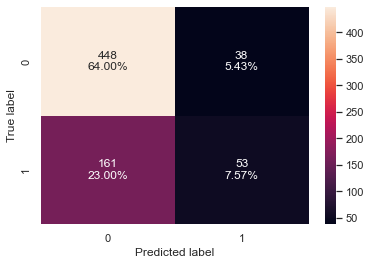

In [50]:
# Threshold as 0.5

confusion_mat(lr,x_train,y_train)

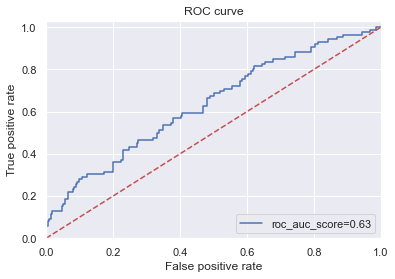

In [51]:
rsc=roc_auc_score(y_test,lr.predict_proba(x_test)[:,1])
fpr,tpr,thres=roc_curve(y_test,lr.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr,label='roc_auc_score=%0.2f'%rsc)
plt.plot([0,1],[0,1],'r--')
plt.xlim(0,1)
plt.ylim(0,1.03)
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

In [52]:
# Threshold as 0.281

test_mod_auc=model_performance(lr,x_test,y_test,threshold=opt_tres)
test_mod_auc

,accuracy,recall,precision,f1_score
0,0.543333,0.686047,0.349112,0.462745


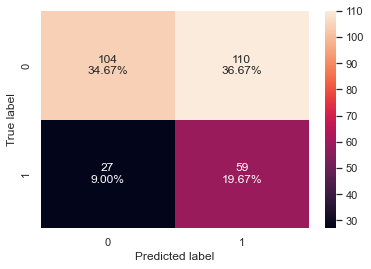

In [53]:
# Threshold as 0.281

confusion_mat(lr,x_test,y_test,opt_tres)

In [54]:
# Threshold as 0.34

test_mod_pr=model_performance(lr,x_test,y_test,threshold=0.34)
test_mod_pr

,accuracy,recall,precision,f1_score
0,0.62,0.511628,0.37931,0.435644


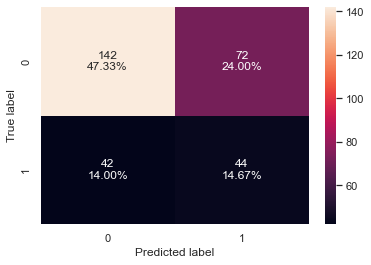

In [55]:
# Threshold as 0.34

confusion_mat(lr,x_test,y_test,threshold=0.34)

### Model Performance comparision

In [56]:
train_model=pd.concat(
[
    train_mod.T,
    train_mod_auc.T,
    train_mod_pr.T
], axis=1)

train_model.columns=['Logistic Regression','Logistic Regression Threshold=0.28','Logistic Regression Threshold=0.34']
train_model

,Logistic Regression,Logistic Regression Threshold=0.28,Logistic Regression Threshold=0.34
accuracy,0.715714,0.622857,0.675714
recall,0.247664,0.752336,0.556075
precision,0.582418,0.432796,0.474104
f1_score,0.347541,0.549488,0.511828


In [57]:
test_model=pd.concat(
[
    test_mod.T,
    test_mod_auc.T,
    test_mod_pr.T
], axis=1)

test_model.columns=['Logistic Regression','Logistic Regression Threshold=0.28','Logistic Regression Threshold=0.34']
test_model

,Logistic Regression,Logistic Regression Threshold=0.28,Logistic Regression Threshold=0.34
accuracy,0.720000,0.543333,0.620000
recall,0.255814,0.686047,0.511628
precision,0.523810,0.349112,0.379310
f1_score,0.343750,0.462745,0.435644


* By changing the threshold of the logistic regression we can see an improvement in model performance
* Depending on the importance of recall or precision the threshold can be choosen.